---
> # **Investment Opportunity Analysis**
>
> **Analyst:** Sabarish  
> **Email:** [selvamsabarish1998@example.com](mailto:selvamsabarish1998@example.com)  
> **LinkedIn:** [Sabarish Selvam](https://www.linkedin.com/in/sabarishselvam/)  
> **Date of Completion:** 2024-04-19
---



> ### **Introduction**

This analysis aims to provide insights into global investment trends to assist Spark Funds in making informed investment decisions. Spark Funds specializes in investing in various companies and seeks to identify the best sectors, countries, and investment types for maximizing returns.

> ### **Objective**

The primary objective of this analysis is to identify the best sectors, countries, and suitable investment types based on global investment trends. The primary objective of this analysis is to identify the best sectors, countries, and suitable investment types based on global investment trends. Spark Funds' strategy is to invest in sectors and countries where most investors are investing, as this indicates these areas offer the best opportunities.

> ### **Investment Constraints**

Spark Funds has set the following constraints for its investments:

1. **Investment Size:** Spark Funds aims to invest between **$05 to $15 million USD** per round of investment.
2. **Geographical Focus:** Spark Funds prefers to invest only in **English-speaking countries** to ensure ease of communication with the invested companies.

> ### **Approach**

To achieve the objectives, the analysis will focus on the following sequence:

1. **Investment Type Analysis:** Examining the distribution of investment amounts across different funding types to identify suitable investment types within the preferred sectors and countries.
2. **Country Analysis:** Identifying the countries with the highest investment activity to determine the most promising geographical locations.
3. **Sector Analysis:** Through comprehensive market analysis, we aim to identify and prioritize the most promising investment sectors for consideration."


---

#**Defining Investment Constraints**

In [160]:
# Define lower and upper limits of Monetary Value
lower_limit = 5e6   # 05 Million
upper_limit = 15e6  # 15 Million

# English Speaking Counties
eng_country=['AUS','NZL','GBR','USA','ATG','BHS','BRB','BLZ','BWA','BDI','CMR','CAN','COK','DMA','SWZ','FJI','GMB','GHA','GRD','GUY','IND','IRL','JAM','KEN','KIR','LSO','LBR','MWI','MLT','MHL','MUS','FSM','NAM','NRU','NGA','NIU','PAK','PLW','PNG','PHL','RWA','KNA','LCA','VCT','WSM','SYC','SLE','SGP','SLB','ZAF','SSD','SDN','TZA','TON','TTO','TUV','UGA','VUT','ZMB','ZWE']


#**Importing Packages**

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#**Loading Files as DataFrame**

In [162]:
# Define URLs for the datasets
Companies_url = "https://raw.githubusercontent.com/DSabarish/InvestmentAnalysis/main/companies.txt"
Rounds2_url = "https://raw.githubusercontent.com/DSabarish/InvestmentAnalysis/main/rounds2.csv"
Mapping_url = "https://raw.githubusercontent.com/DSabarish/InvestmentAnalysis/main/mapping.csv"

try:
    # Read data into pandas DataFrames
    C = pd.read_csv(Companies_url, sep='\t', encoding='ISO-8859-1')
    R = pd.read_csv(Rounds2_url, encoding='ISO-8859-1')
    M = pd.read_csv(Mapping_url, encoding='ISO-8859-1')

    # Display the first few rows of each DataFrame to verify data
    print("All Files Loaded Successfully")

except pd.EmptyDataError:
    print("Error: No data found in one or more files.")
except pd.errors.ParserError as e:
    print(f"Error parsing data: {e}")
except pd.errors.HTTPError as e:
    print(f"HTTP error occurred: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


All Files Loaded Successfully


#**Data Quality Exploration**

The `DataQuality_stats` function provides an overview of a DataFrame's structure and quality, showing row and column counts, unique values, and percentages of null values. This helps streamline the exploratory data analysis (EDA) process by swiftly identifying data issues, such as missing values, which in turn aids in efficient data cleaning and preprocessing for focused analysis.

In [163]:
# User Defined Function to check the quality of data in dataframe.

def DataQuality_stats(df):
    print("Rows:", df.shape[0])
    print("Columns:", df.shape[1])
    print("Data Quality:")
    stats = pd.DataFrame({
        '#Rows': df.shape[0],
        '#Unique Values': df.nunique(),
        '#Null Values': df.isnull().sum(),
        '%Null Values': round((df.isnull().mean() * 100), 2)
    })
    return stats

### **Exploring Company Dataframe**

In [164]:
C.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [165]:
C.head(4)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [166]:
print("Company File")
DataQuality_stats(C)

Company File
Rows: 66368
Columns: 10
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
permalink,66368,66368,0,0.00
name,66368,66102,1,0.00
homepage_url,66368,61191,5058,7.62
category_list,66368,27296,3148,4.74
status,66368,4,0,0.00
country_code,66368,137,6958,10.48
state_code,66368,311,8547,12.88
region,66368,1092,8030,12.10
city,66368,5111,8028,12.10
founded_at,66368,3978,15221,22.93


### **Exploring Rounds Dataframe**

In [167]:
R.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [168]:
R.head(4)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0


In [169]:
print("Round2 File")
DataQuality_stats(R)

Round2 File
Rows: 114949
Columns: 6
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
company_permalink,114949,90247,0,0.00
funding_round_permalink,114949,114949,0,0.00
funding_round_type,114949,14,0,0.00
funding_round_code,114949,8,83809,72.91
funded_at,114949,5033,0,0.00
raised_amount_usd,114949,22095,19990,17.39



The following code **lowers the case** of the *'permalink'* and *'company_permalink'* columns to ensure consistent text matching during the merge operation. This minimizes the chances of mismatches caused by case variations, enhancing the accuracy of the inner join. By aligning the data correctly based on these unique identifiers, this preprocessing step boosts the reliability of the merged dataset for further analysis.


In [170]:
print(f"No. of Rows in Company Dataframe : {C.shape[0]}\nNo. of Rows in Rounds Dataframe : {R.shape[0]}\n")

# Lowercasing 'permalink','company_permalink columns from C, R respecively.
C['permalink'] = C['permalink'].str.lower()
R['company_permalink'] = R['company_permalink'].str.lower()

# Performing inner join between DataFrames C and R based on 'permalink' and 'company_permalink'.
merged_df = pd.merge(C, R,
                     how='inner', left_on='permalink', right_on='company_permalink')

print("Merged DataFrame")
DataQuality_stats(merged_df)


No. of Rows in Company Dataframe : 66368
No. of Rows in Rounds Dataframe : 114949

Merged DataFrame
Rows: 114940
Columns: 16
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
permalink,114940,66361,0,0.00
name,114940,66095,1,0.00
homepage_url,114940,61186,6132,5.33
category_list,114940,27294,3406,2.96
status,114940,4,0,0.00
country_code,114940,137,8670,7.54
state_code,114940,311,10938,9.52
region,114940,1092,10159,8.84
city,114940,5111,10156,8.84
founded_at,114940,3977,20520,17.85



The significance of this code is to **streamline** the dataset for analysis by removing columns that are **not relevant** or do not add **substantial value** to the analysis. By dropping these **insignificant columns**, the dataset becomes more **focused**, making it easier to interpret and analyze the essential data. This process can enhance the **efficiency** and **accuracy** of subsequent analytical tasks and visualizations.


In [171]:
# Removing Insignificant Columns that Aren't Adding Value for the Analysis

columns_to_drop = ['funded_at', 'founded_at', 'funding_round_permalink', 'funding_round_code', 'homepage_url', 'state_code', 'region', 'city']

merged_df = merged_df.drop(columns=columns_to_drop, axis=1)

merged_df.columns


Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'company_permalink', 'funding_round_type', 'raised_amount_usd'],
      dtype='object')


The provided code focuses on **cleaning** the dataset by **removing rows** with missing values in key columns.
- It **filters out** rows without a 'raised_amount_usd' value, ensuring the dataset only contains investment amounts crucial for financial analysis.
- Rows lacking a 'country_code' are **excluded**, which is vital for **geographical analysis** as it helps in segmenting and understanding investments by country.
- Similarly, rows without a 'category_list' entry are **eliminated**, essential for **sector-wise analysis**, aiding in identifying investment trends across different sectors.


In [172]:
# Cleaning Data: Remove Rows with Missing Values

# Removing rows with missing values in the 'raised_amount_usd' column
merged_df = merged_df[pd.notnull(merged_df['raised_amount_usd'])]

# Removing rows with missing values in the 'country_code' column
# This ensures we exclude rows without country code information, necessary for geographical analysis
merged_df = merged_df[pd.notnull(merged_df['country_code'])]

# Removing rows with missing values in the 'category_list' column
# This ensures we exclude rows without category list information, necessary for sector-wise analysis
merged_df = merged_df[pd.notnull(merged_df['category_list'])]

# Displaying the cleaned master_frame DataFrame
print("Cleaned merged_df:")
merged_df.sample(n=4)


Cleaned merged_df:


,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd
111406,/organization/work-movement,Josla,Clean Technology|Computers|Medical Devices|Tel...,operating,GBR,/organization/work-movement,angel,100000.0
59413,/organization/massbioed,MassBioEd,EdTech|Education,operating,USA,/organization/massbioed,grant,100000.0
111771,/organization/wunwun,Wunwun,E-Commerce,operating,USA,/organization/wunwun,venture,16000000.0
36469,/organization/flo-do,Simpliday,Application Platforms|Apps,operating,SWE,/organization/flo-do,seed,700800.0


The following code **creates** a 'primary_sector' column by extracting the first category from 'category_list'. This simplifies sector classification, aiding in clearer sector-wise analysis and facilitating comparisons.


In [173]:
# Extracting the first category of category_list as the primary_sector.

merged_df['primary_sector'] = merged_df['category_list'].apply(lambda v: v.split('|')[0].lower())

# Displaying the 'primary_sector' column
merged_df.head(4)


,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,venture,10000000.0,media
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/organization/-qounter,seed,700000.0,application platforms
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,venture,2000000.0,curated web
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/organization/01games-technology,undisclosed,41250.0,games


In [174]:
print("Cleaned merged_df:")
DataQuality_stats(merged_df)

Cleaned merged_df:
Rows: 88528
Columns: 9
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
permalink,88528,48729,0,0.0
name,88528,48599,1,0.0
category_list,88528,21316,0,0.0
status,88528,4,0,0.0
country_code,88528,134,0,0.0
company_permalink,88528,48729,0,0.0
funding_round_type,88528,14,0,0.0
raised_amount_usd,88528,20693,0,0.0
primary_sector,88528,708,0,0.0


In [175]:
R['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

An overview of the different **Funding Round Types** and their descriptions.




| Funding Round Type   | Description                                                                                        |
|----------------------|----------------------------------------------------------------------------------------------------|
| Venture              | Funding for new and growing companies with big ideas.                                              |
| Seed                 | Early funding to help start a business or develop a product.                                        |
| Undisclosed          | Funding where details are not publicly shared.                                                      |
| Equity Crowdfunding | Money raised from many people in exchange for a stake in the company.                               |
| Convertible Note     | Short-term loan that can be converted into ownership in the future.                                 |
| Private Equity       | Investment in established companies looking to grow or restructure.                                 |
| Debt Financing       | Borrowing money that needs to be repaid with interest.                                              |
| Angel                | Investment from wealthy individuals who believe in a startup's potential.                            |
| Grant                | Free money awarded for specific projects or initiatives.                                             |
| Secondary Market     | Buying and selling existing shares between investors.                                               |
| Post IPO Equity      | Funds raised by a company selling shares after going public.                                         |
| Post IPO Debt        | Debt taken on by a company after becoming publicly traded.                                           |
| Product Crowdfunding | Money raised from the public for creating a new product.                                             |
| Non-equity Assistance| Help given without expecting ownership in return, like loans or grants.                              |


### **Exploring Mapping Dataframe**

In [176]:
M.sample(n=4)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
23,Android,0,0,0,0,0,0,0,0,1
393,Kids,0,0,0,0,0,0,0,1,0
447,Mobile Advertising,0,0,0,0,0,0,0,0,1
16,Air Pollution Control,0,0,1,0,0,0,0,0,0


In [177]:
DataQuality_stats(M)

Rows: 688
Columns: 10
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
category_list,688,687,1,0.15
Automotive & Sports,688,2,0,0.00
Blanks,688,2,0,0.00
Cleantech / Semiconductors,688,2,0,0.00
Entertainment,688,2,0,0.00
Health,688,2,0,0.00
Manufacturing,688,2,0,0.00
"News, Search and Messaging",688,2,0,0.00
Others,688,2,0,0.00
"Social, Finance, Analytics, Advertising",688,2,0,0.00


In [178]:
# Removing NaN
M = M[pd.notnull(M['category_list'])]

In [179]:
DataQuality_stats(M)

Rows: 687
Columns: 10
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
category_list,687,687,0,0.0
Automotive & Sports,687,2,0,0.0
Blanks,687,1,0,0.0
Cleantech / Semiconductors,687,2,0,0.0
Entertainment,687,2,0,0.0
Health,687,2,0,0.0
Manufacturing,687,2,0,0.0
"News, Search and Messaging",687,2,0,0.0
Others,687,2,0,0.0
"Social, Finance, Analytics, Advertising",687,2,0,0.0


The following code **determines** the main sector for each row in the DataFrame based on binary columns, providing a **categorized** view of sectors for analysis.
- By utilizing the `label` function, it **efficiently** identifies the primary sector from the available binary columns.
- This classification is crucial for **segmenting** and **understanding** the distribution of investments across various sectors, aiding in targeted analysis and insights.


In [180]:
## Assigning Main Sectors Based on Binary Columns in DataFrame.

# Define the label function
def label(row):
    for column in row.index:
        if row[column] == 1:
            return column
    return 'Other'

# Applying the label function to each row in the DataFrame
main_sector = M.apply(lambda row: label(row), axis=1)

# Print the length of main_sector
print(len(main_sector))

# Print the resulting main_sector Series
main_sector


687


1                                Manufacturing
2                                Manufacturing
3                                Manufacturing
4      Social, Finance, Analytics, Advertising
5                                       Health
                        ...                   
683                                     Others
684                              Entertainment
685                              Entertainment
686                                     Others
687                                     Others
Length: 687, dtype: object

The following code **standardizes** and **sorts** the primary sectors from the 'category_list' column, ensuring **consistency** and aiding in **cleaner analysis**.
- By displaying unique primary sectors, it **spotlights** potential **data anomalies** or typos, like "0" instead of "na", prompting necessary **data cleaning** steps.


In [181]:
## Sorting and Displaying Unique Primary Sectors from Category List in DataFrame

primary_sector=M['category_list'].str.lower()

primary_sector=primary_sector.sort_values(ascending=True)
primary_sector.unique()[100:150]

## We observed instances of typos, such as using "0" instead of "na."

array(['charities', 'charity', 'charter schools', 'chat', 'chemicals',
       'chi0 internet', 'child care', 'civil engineers', 'classifieds',
       'clean energy', 'clean technology', 'clean technology it',
       'clinical trials', 'cloud computing', 'cloud data services',
       'cloud infrastructure', 'cloud ma0gement', 'cloud security',
       'cloud-based music', 'coffee', 'collaboration',
       'collaborative consumption', 'collectibles', 'college campuses',
       'college recruiting', 'colleges', 'comics',
       'commercial real estate', 'commercial solar', 'commodities',
       'communications hardware', 'communications infrastructure',
       'communities', 'comparison shopping', 'computer vision',
       'computers', 'concentrated solar power', 'concerts',
       'console gaming', 'construction', 'consulting',
       'consumer behavior', 'consumer electronics', 'consumer goods',
       'consumer internet', 'consumer lending', 'consumers',
       'contact centers', 'conta

In [182]:
#Replacing "0" with "na"

primary_sector = primary_sector.apply(lambda x: x.replace('0', 'na'))
primary_sector.sort_values(ascending=True)

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

The code **constructs** a `master_mapping` DataFrame that links standardized primary sectors with their respective main sectors.
- This mapping is **crucial** for **streamlining** sector-wise analysis, facilitating easier segmentation and understanding of investment patterns across sectors.


In [183]:
#Making new dataframe for evaluation
master_mapping = pd.DataFrame({'primary_sector':primary_sector.values,
                               'main_sector':main_sector.values})

master_mapping.sample(n=4)

,primary_sector,main_sector
142,consumer electronics,"Social, Finance, Analytics, Advertising"
151,content delivery,Health
632,supply chain management,Others
48,auto,"Social, Finance, Analytics, Advertising"


Cleaned Data Backup :

In [184]:
# Exporting Cleaned Data 'merged_df' to CSV for Backup
merged_df.to_csv('Cleaned_Investment_data_88K.csv')

# **Deep Dive into Investment Trends**



## **1. Investment Criteria: Spark Funds' Allocation of Investment Amounts for the Funding Round**

The following code **analyzes** the average investment amounts across different funding round types, providing **insights** into funding preferences and trends.
- Grouping by 'funding_round_type' helps **segment** the data, allowing for **comparative analysis** and understanding of investment behavior.
- The sorted average amounts offer a **clear picture** of the typical investment size associated with each funding round type, aiding in **strategic decision-making**.


In [185]:
# Grouping the master_frame by 'funding_round_type'.
funding_round_type_group = merged_df.groupby('funding_round_type')

# Calculating the average investment amount for each funding round type.
avg_fund = funding_round_type_group['raised_amount_usd'].mean().sort_values(ascending=False).astype(int)

# Displaying the average investment amount for each funding round type.
avg_fund

funding_round_type
post_ipo_debt            169451789
secondary_market          84438532
private_equity            73938486
post_ipo_equity           66077058
debt_financing            17167653
undisclosed               15891661
venture                   11724222
grant                      4515024
product_crowdfunding       1353226
convertible_note           1337186
angel                       971573
seed                        747793
equity_crowdfunding         509897
non_equity_assistance       480753
Name: raised_amount_usd, dtype: int64

The following code **defines** specific **investment amount limits** to narrow down the focus on particular funding round types.
- By **filtering** the funding round types based on these limits, it helps in **identifying** and **analyzing** investment patterns within a desired investment range.
- The resulting **filtered_types_list** provides a **targeted list** of funding round types, enabling a **more precise** and **relevant analysis** of investment trends.


In [186]:
# Set lower and upper limits for the average investment amount
LL = lower_limit
UL = upper_limit

# Filter funding round types based on the limits
mask = (avg_fund >= LL) & (avg_fund <= UL)
filtered_types = avg_fund.loc[mask]

# Display the funding round types
print("Funding Round Types within the specified range:")
filtered_types_list = [i for i in filtered_types.index]
filtered_types_list

Funding Round Types within the specified range:


['venture']

Investment Amount Distribution across Funding Round Types

<ipython-input-187-ec060e35b137>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




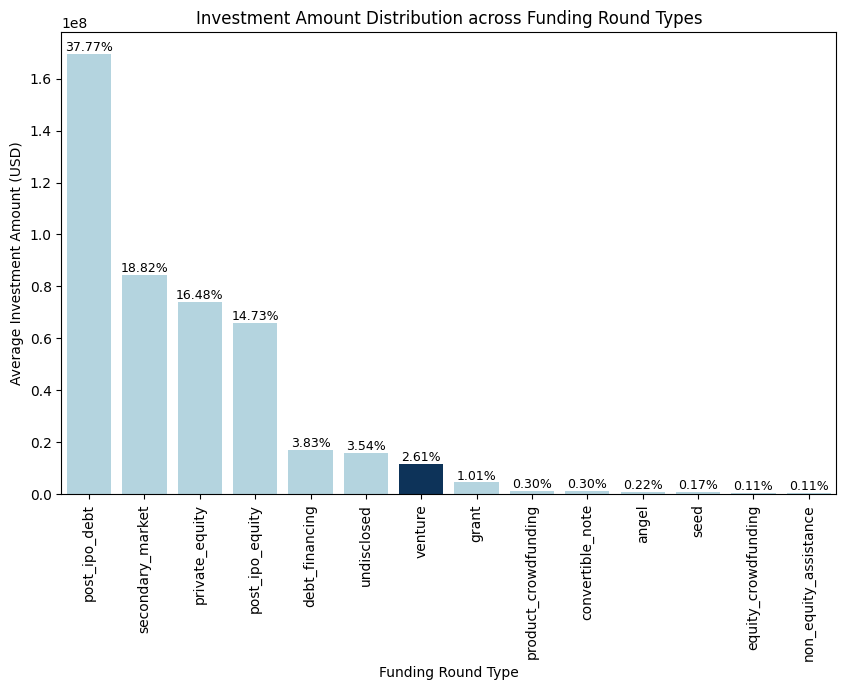

In [187]:
## Bar Chart

# Create a color palette
colors = ['lightblue' if not m else '#003366' for m in mask]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with log scale for y-axis
ax = sns.barplot(x=avg_fund.index, y=avg_fund.values, palette=colors, linewidth=2)

# Set plot labels and title
plt.title('Investment Amount Distribution across Funding Round Types')
plt.xlabel('Funding Round Type')
plt.ylabel('Average Investment Amount (USD)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add percentage labels
total = sum(avg_fund.values)
for i, val in enumerate(avg_fund.values):
    plt.text(i, val, f'{(val/total)*100:.2f}%', color='black', ha='center', va='bottom', fontsize=9)


# Show the plot
plt.show()

The following code **refines** the dataset by **isolating** records associated with the funding round types within the specified investment amount range.
- By **filtering** based on the `filtered_types_list`, it focuses the analysis on **relevant** and **targeted** investment trends.
- The resulting `Filter1` DataFrame offers a **streamlined view**, aiding in **more accurate** and **insightful analysis** of investments falling within the desired range.


In [188]:
# Filter merged_df for records where funding_round_type is in filtered_types_list
Filter1 = merged_df[merged_df['funding_round_type'].isin(filtered_types_list)]

Filter1.sample(n=4)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector
66958,/organization/nettalon,NetTalon,Security,operating,USA,/organization/nettalon,venture,446000.0,security
2230,/organization/adaptiveblue,AdaptiveBlue,Entertainment|Games|Reviews and Recommendation...,acquired,USA,/organization/adaptiveblue,venture,1500000.0,entertainment
37019,/organization/footbo,RocketPlay,Games,operating,GBR,/organization/footbo,venture,1000000.0,games
4812,/organization/alseres-pharmaceuticals,Alseres Pharmaceuticals,Biotechnology,operating,USA,/organization/alseres-pharmaceuticals,venture,3900000.0,biotechnology


In [189]:
print("Filter1 DataFrame:")

DataQuality_stats(Filter1)

Filter1 DataFrame:
Rows: 47809
Columns: 9
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
permalink,47809,27332,0,0.0
name,47809,27292,0,0.0
category_list,47809,9946,0,0.0
status,47809,4,0,0.0
country_code,47809,97,0,0.0
company_permalink,47809,27332,0,0.0
funding_round_type,47809,1,0,0.0
raised_amount_usd,47809,11978,0,0.0
primary_sector,47809,603,0,0.0


> **Inference**: Based on our analysis of the code cells above, we have identified that the **venture** round type aligns with the Spark Fund's investment plan. Applying this filter significantly reduced our data count from 88k to 47k, streamlining it for further analysis.

## **2. Investment Criteria: Spark Funds' Preference for English-Speaking Territories**

The following code **focuses** on **English-speaking countries**, offering a **localized view** of investment trends within these markets.
- By **aggregating** total investments per country, it highlights the **dominant** investment landscapes among English-speaking nations.
- The resulting `top_10_country_investments` provides a **concise list** of the leading countries, guiding **strategic investment decisions** and **geographical focus** for further analysis.


In [190]:
# Filtering only the English-speaking countries from the filtered DataFrame
english_speaking_countries = Filter1[Filter1['country_code'].isin(eng_country)]

# Group by 'country_code', sum up the 'raised_amount_usd' for each country,
# and sort the results in descending order of total investment
total_investment_by_country = (
    english_speaking_countries.groupby('country_code')['raised_amount_usd']
    .sum()
    .sort_values(ascending=False)
)

# Selecting the top 10 countries based on their total investment
top_10_country_investments = total_investment_by_country.head(10)

# Displaying the top 10 English-speaking countries and their total investments
print("Top 10 English-Speaking Countries by Total Investment (USD):")
top_10_country_investments


Top 10 English-Speaking Countries by Total Investment (USD):


country_code
USA    4.200680e+11
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
SGP    2.793918e+09
IRL    1.669286e+09
AUS    1.319029e+09
NZL    4.483164e+08
ZAF    2.337131e+08
NGA    1.834400e+08
Name: raised_amount_usd, dtype: float64

Top 10 English-Speaking Countries by Investment Contribution

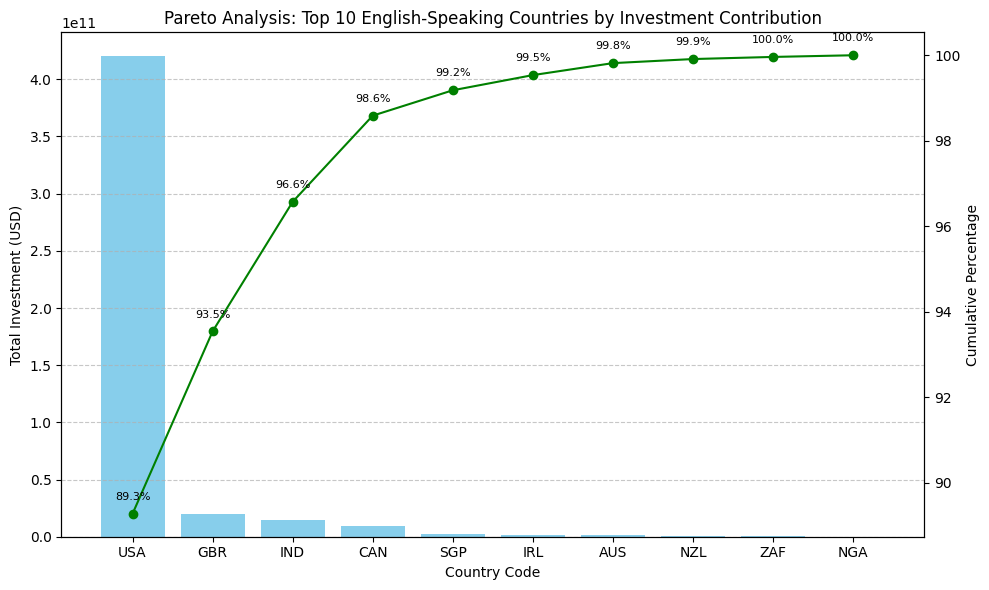

In [191]:
## Pareto Chart

# Calculating the cumulative percentage of total investment
cumulative_percentage = top_10_country_investments.cumsum() / top_10_country_investments.sum() * 100

# Plotting the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for individual contributions
ax1.bar(top_10_country_investments.index, top_10_country_investments, color='skyblue')
ax1.set_xlabel('Country Code')
ax1.set_ylabel('Total Investment (USD)', color='black')
ax1.tick_params(axis='y', colors='black')

# Secondary y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(top_10_country_investments.index, cumulative_percentage, color='green', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Percentage', color='black')
ax2.tick_params(axis='y', colors='black')

# Adding cumulative percentage labels
for i, perc in enumerate(cumulative_percentage):
    ax2.annotate(f'{perc:.1f}%', (top_10_country_investments.index[i], perc),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Adding gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Title and labels
plt.title('Pareto Analysis: Top 10 English-Speaking Countries by Investment Contribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The **Pareto Analysis** represented above exhibits the **investment distribution** across the top 10 English-speaking countries.
- It highlights that **three countries** dominate with a staggering **96%** share of the total investment monetary value, adhering to the **'vital few, trivial many'** principle.
- This insight underscores the **importance** of focusing on these **key markets** for maximizing investment returns and strategic planning.


The following code **narrows down** the analysis to focus solely on **high-investment English-speaking countries**.
- By **filtering** based on the top 10 countries, it concentrates the analysis on **key markets** driving significant investment trends.
- The resulting `filtered_by_top_investments` DataFrame offers a **strategically refined dataset**, aiding in **targeted analysis** and **informed decision-making** for investments in prominent English-speaking markets.


In [192]:
# Filtering 'Filter1' dataframe based on whether country_code is in the top 10 English-speaking countries.

mask1=(Filter1['country_code'].isin(top_10_country_investments.index))
filtered_by_top_investments = Filter1[mask1]                             #=ventire+top 10 english country

# Displaying the filtered DataFrame
print("Filtered DataFrame based on Top 10 English-Speaking Country Codes:")
filtered_by_top_investments.sample(n=10)


Filtered DataFrame based on Top 10 English-Speaking Country Codes:


,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector
84588,/organization/rome-corporation,ROME Corporation,Software,acquired,USA,/organization/rome-corporation,venture,14000000.0,software
75748,/organization/pirate3d,Pirate3D,3D Printing|3D Technology|Consumer Electronics,operating,SGP,/organization/pirate3d,venture,1438760.0,3d printing
73670,/organization/pax8,Pax8,Software,operating,USA,/organization/pax8,venture,350000.0,software
102429,/organization/treasure-valley-urology-services,Treasure Valley Urology Services,Biotechnology,operating,USA,/organization/treasure-valley-urology-services,venture,47192.0,biotechnology
8165,/organization/aspex-semiconductor,Aspex Semiconductor,Semiconductors,operating,GBR,/organization/aspex-semiconductor,venture,10000000.0,semiconductors
108044,/organization/vitals-com,Vitals,Health and Wellness,operating,USA,/organization/vitals-com,venture,22000000.0,health and wellness
60447,/organization/medshape,MedShape,Health Care,closed,USA,/organization/medshape,venture,9785108.0,health care
18663,/organization/certivox,CertiVox,Information Services|SaaS|Security|Services,operating,GBR,/organization/certivox,venture,2390282.0,information services
78430,/organization/procore-technologies,"Procore Technologies, Inc.",Construction|Software,operating,USA,/organization/procore-technologies,venture,4000000.0,construction
85457,/organization/sailthru,Sailthru,Ad Targeting|Analytics|Big Data|E-Commerce|Ema...,operating,USA,/organization/sailthru,venture,8000000.0,ad targeting


In [193]:
DataQuality_stats(filtered_by_top_investments)

Rows: 40780
Columns: 9
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
permalink,40780,22445,0,0.0
name,40780,22415,0,0.0
category_list,40780,8326,0,0.0
status,40780,4,0,0.0
country_code,40780,10,0,0.0
company_permalink,40780,22445,0,0.0
funding_round_type,40780,1,0,0.0
raised_amount_usd,40780,9666,0,0.0
primary_sector,40780,573,0,0.0


In [194]:
# Selecting top 3 countries that accounts for 96% of monetary value
# and further to investigate the investment opportunities in these, out of the  top 10 countries.

top_3_country_investments = total_investment_by_country.head(3)
top_3_country_investments.index

Index(['USA', 'GBR', 'IND'], dtype='object', name='country_code')

The following code **prioritizes** the **most impactful** English-speaking countries by focusing on the top 3 nations accounting for a significant 96% of total investments.
- By **isolating** these top countries in `Filter2`, it **streamlines** the analysis to **key markets** offering the highest investment potential.
- The subsequent grouping and sorting provide a **clear ranking** of these countries based on their contribution to total investments.


In [195]:
# Filter 2 is the filtered DataFrame that contains only the top 3 countries which speak English
Filter2 = Filter1[Filter1['country_code'].isin(top_3_country_investments.index)]
Filter2.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.200680e+11
GBR    2.007281e+10
IND    1.426151e+10
Name: raised_amount_usd, dtype: float64

> **Inference**: From the above code cells and the Pareto Analysis, we observe that the top 3 countries i.e USA, GBR and IND contribute to 96% of the total investments in **venture type**. Applying this filter significantly reduced our data count from 47k to 40k, streamlining it for further analysis







In [196]:
Filter2.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'company_permalink', 'funding_round_type', 'raised_amount_usd',
       'primary_sector'],
      dtype='object')

In [197]:
# Filter the DataFrame based on the conditions
filtered_rows = Filter2[(Filter2['country_code'].isin(['USA', 'IND', 'GBR'])) & (Filter2['raised_amount_usd'] == 0)]

# Count the number of rows
num_rows = len(filtered_rows)

print(f"Number of rows where country is USA, IND, GBR and raised_amount_usd is 0: {num_rows}")


# Filter the DataFrame to exclude the specified rows
Filter2 = Filter2[~((Filter2['country_code'].isin(['USA', 'IND', 'GBR'])) & (Filter2['raised_amount_usd'] == 0))]

# Reset the index of the DataFrame
Filter2.reset_index(drop=True, inplace=True)

# Check the updated DataFrame
Filter2.sample(3)


Number of rows where country is USA, IND, GBR and raised_amount_usd is 0: 18


,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector
12667,/organization/flatclub,FlatClub,E-Commerce|Education|Peer-to-Peer|Travel,operating,GBR,/organization/flatclub,venture,1500000.0,e-commerce
8584,/organization/cortexica,Cortexica,Brand Marketing|Graphics|Search|Software|Syste...,operating,GBR,/organization/cortexica,venture,2515786.0,brand marketing
19820,/organization/m-via,Boom Financial,Finance|Mobile,operating,USA,/organization/m-via,venture,17000000.0,finance


The provided code generates an **interactive box plot** visualizing the distribution of raised amounts across three specified countries: USA, GBR, and IND. The box plot displays **quartiles** (Q1, median, Q3) and **outliers** for each country, providing insights into the **investment distribution** and potential **variation** within each market.


In [198]:
# Define a business-friendly color palette
business_colors = {
    'USA': '#1f77b4',  # blue
    'GBR': '#2ca02c',  # green
    'IND': '#7f7f7f'   # gray
}

# Calculate the 5th percentile for each country
lower_fences = Filter2.groupby('country_code')['raised_amount_usd'].quantile(0.05).to_dict()

# Create an interactive box plot using Plotly
fig = px.box(Filter2,
             x='country_code',
             y='raised_amount_usd',
             color='country_code',
             title='Box Plot of Raised Amount by Country (Log Scale)',
             labels={'raised_amount_usd': 'Raised Amount (USD)', 'country_code': 'Country Code'},
             log_y=True,  # Set y-axis scale to logarithmic
             color_discrete_map=business_colors)

# Customize hover labels to display quartiles
fig.update_traces(boxmean=True, hovertemplate='Country: %{x}<br>Raised Amount: %{y:.2f}<br>' +
                  'Q1: %{lower}<br>Median: %{q1}<br>Q3: %{upper}')

# Adjust the lower whisker length
fig.update_traces(lowerfence=[lower_fences[country] for country in Filter2['country_code'].unique()])

# Update the plot layout to decrease size
fig.update_layout(height=800, width=800)

# Set y-axis range to 10,000
fig.update_yaxes(range=[5, 10])

# Show the plot
fig.show()


## **3. Investment Criteria: Spark Funds' Preferences for the Most-Invested Sector**

In [199]:
master_mapping.sample(n=4)

,primary_sector,main_sector
485,oil,Others
59,beauty,"Social, Finance, Analytics, Advertising"
288,forums,Entertainment
7,analytics,Automotive & Sports


In [200]:
Filter2.sample(n=4)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector
28660,/organization/ridecharge,"Curb (RideCharge, Inc.)",Android|iPhone|Mobile|Transportation|Travel,acquired,USA,/organization/ridecharge,venture,2100000.0,android
25347,/organization/pepperfry-com,Pepperfry.com,E-Commerce,operating,IND,/organization/pepperfry-com,venture,100000000.0,e-commerce
31289,/organization/socialstay,SocialStay,Hospitality|Mobile|Web Development,operating,USA,/organization/socialstay,venture,100000.0,hospitality
17053,/organization/invidi-technologies,INVIDI Technologies,Software,operating,USA,/organization/invidi-technologies,venture,49000000.0,software


In [201]:
len(Filter2),len(master_mapping)

(38785, 687)

The following code **enhances** the `Filter2` DataFrame by **incorporating** sector information from `master_mapping` through an **inner join** based on 'primary_sector'.



In [202]:
# Joining Filter2 and Master_mapping DataFrames on 'primary_sector'

Filter2 = pd.merge(Filter2,                  # Left DataFrame
                   master_mapping,           # Right DataFrame
                   how='inner',              # Inner join
                   on='primary_sector')      # Column to join on

# Sampling 4 records from the joined DataFrame
Filter2.sample(n=4)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector
37272,/organization/light,light,Photography,operating,USA,/organization/light,venture,9700000.0,photography,Entertainment
29891,/organization/hightail,Hightail,Collaboration|File Sharing|Mobile|Storage,operating,USA,/organization/hightail,venture,14000000.0,collaboration,"Social, Finance, Analytics, Advertising"
31654,/organization/kabbage,Kabbage,Credit|Finance|FinTech|Technology,operating,USA,/organization/kabbage,venture,17000000.0,credit,"Social, Finance, Analytics, Advertising"
30508,/organization/peanutlabs,Peanut Labs,Social Media,acquired,USA,/organization/peanutlabs,venture,1000000.0,social media,"Social, Finance, Analytics, Advertising"



The following code cells **segments** the `Filter2` DataFrame into **country-specific subsets** based on the investment amount criteria (`lower_limit` to `upper_limit`).
- This **partitioning** allows for a **detailed investigation** of investment activities within **USA**, **GBR**, and **IND**, aiding in **country-focused analysis**.
- By creating these **targeted DataFrames**, it **simplifies** and **streamlines** the exploration of investment patterns and opportunities within each country, guiding **localized investment strategies**.





*USA_Investments*

---



In [203]:
# Creating DataFrame for USA with raised_amount between LL and UL
USA_investment = Filter2[
    (Filter2['raised_amount_usd'] >= lower_limit) &  # Filter for raised_amount_usd >= 5M
    (Filter2['raised_amount_usd'] <= upper_limit) &  # Filter for raised_amount_usd <= 15M
    (Filter2['country_code'] == 'USA')  # Filter for country_code == 'USA'
]
print(USA_investment.shape)
USA_investment.sample(n=5)

(12063, 10)


,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector
2634,/organization/openlane,OPENLANE,Curated Web,acquired,USA,/organization/openlane,venture,10000000.0,curated web,"Social, Finance, Analytics, Advertising"
28380,/organization/netmotion-wireless,NetMotion Wireless,Mobile|Trusted Networks|Wireless,acquired,USA,/organization/netmotion-wireless,venture,10800000.0,mobile,"News, Search and Messaging"
17035,/organization/mogreet,Mogreet,Advertising|App Marketing|Messaging|Mobile|Sal...,acquired,USA,/organization/mogreet,venture,5000000.0,advertising,Automotive & Sports
35050,/organization/meraki,Meraki,Networking|Network Security,acquired,USA,/organization/meraki,venture,15000000.0,networking,Others
25679,/organization/simraceway,Simraceway,Games,operating,USA,/organization/simraceway,venture,7500000.0,games,Others


*GBR_Investments*

---



In [204]:
# Creating DataFrame for GBR with raised_amount between LL and UL
GBR_investment = Filter2[
    (Filter2['raised_amount_usd'] >= lower_limit) &  # Filter for raised_amount_usd >= lower_limit
    (Filter2['raised_amount_usd'] <= upper_limit) &  # Filter for raised_amount_usd <= upper_limit
    (Filter2['country_code'] == 'GBR')  # Filter for country_code == 'GBR'
]
print(GBR_investment.shape)
# Sampling 5 records from the GBR_investment DataFrame
GBR_investment.sample(n=5)

(621, 10)


,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector
15164,/organization/srl-global,SRL Global,Enterprise Software|Intellectual Asset Management,operating,GBR,/organization/srl-global,venture,11625112.0,enterprise software,Others
36468,/organization/onetwotrip,OneTwoTrip,Travel,operating,GBR,/organization/onetwotrip,venture,8000000.0,travel,Entertainment
18242,/organization/camsemi,CamSemi,Clean Technology,operating,GBR,/organization/camsemi,venture,8000000.0,clean technology,"News, Search and Messaging"
35466,/organization/stylistpick,Stylistpick,Fashion,operating,GBR,/organization/stylistpick,venture,11000000.0,fashion,Entertainment
24447,/organization/xconnect,XConnect Global Networks,Messaging|VoIP,operating,GBR,/organization/xconnect,venture,12000000.0,messaging,Cleantech / Semiconductors


*IND_Investments*

---



In [205]:
# Creating DataFrame for IND with raised_amount between LL and UL
IND_investment = Filter2[
    (Filter2['raised_amount_usd'] >= lower_limit) &  # Filter for raised_amount_usd >= lower_limit
    (Filter2['raised_amount_usd'] <= upper_limit) &  # Filter for raised_amount_usd <= upper_limit
    (Filter2['country_code'] == 'IND')  # Filter for country_code == 'IND'
]
print(IND_investment.shape)
# Sampling 5 records from the IND_investment DataFrame
IND_investment.sample(n=5)

(328, 10)


,permalink,name,category_list,status,country_code,company_permalink,funding_round_type,raised_amount_usd,primary_sector,main_sector
38113,/organization/culturealley,CultureAlley,Browser Extensions|Education|Facebook Applicat...,operating,IND,/organization/culturealley,venture,6500000.0,browser extensions,"Social, Finance, Analytics, Advertising"
19547,/organization/cura-healthcare,CURA Healthcare,Health and Wellness|Hospitals|Manufacturing|Me...,operating,IND,/organization/cura-healthcare,venture,9000000.0,health and wellness,Health
23411,/organization/electronic-payment-and-services,Electronic Payment and Services (EPS),Hardware + Software,operating,IND,/organization/electronic-payment-and-services,venture,6000000.0,hardware + software,Health
34838,/organization/lenskart-com,Lenskart.com,Consumer Goods|Eyewear|Online Shopping,operating,IND,/organization/lenskart-com,venture,10000000.0,consumer goods,"Social, Finance, Analytics, Advertising"
34011,/organization/shopclues-com,ShopClues.com,Consumer Internet|E-Commerce|Shopping,operating,IND,/organization/shopclues-com,venture,15000000.0,consumer internet,"Social, Finance, Analytics, Advertising"


**Analyzing Investment Patterns: Total and Average Amounts per Country**

The code **analyzes** the `Filter2` DataFrame to derive **aggregate investment statistics** based on defined investment limits.
- It computes **key metrics** including the **count**, **total amount**, and **average amount** of investments for each country, offering a **comprehensive summary** of investment activities within the specified range.
- By **formatting** these statistics in millions with a dollar sign, it **enhances readability** and **facilitates comparative analysis**, aiding in **informed decision-making** for investment strategies across countries.


In [206]:
# Define lower and upper investment limits
LL = lower_limit
UL = upper_limit

# Filter DataFrame based on investment limits
filtered_df = Filter2[
    (Filter2['raised_amount_usd'] >= LL) &
    (Filter2['raised_amount_usd'] <= UL)
]

# Compute aggregate statistics using agg method
agg_stats = filtered_df.groupby('country_code')['raised_amount_usd'].agg(
    count='count',                   # Count of investments
    total_amount='sum',              # Total investment amount
    average_amount='mean'            # Average investment amount
)

# Convert total and average investment amounts to millions and format with a dollar sign
agg_stats[['total_amount', 'average_amount']] = agg_stats[['total_amount', 'average_amount']].apply(lambda x: x/1e6).applymap(lambda x: '${:,.2f}M'.format(x))

# Display the formatted aggregate statistics
agg_stats


,count,total_amount,average_amount
country_code,,,
GBR,621,"$5,379.08M",$8.66M
IND,328,"$2,949.54M",$8.99M
USA,12063,"$107,757.10M",$8.93M


The following code **analyzes** sector-specific investment trends across the USA, GBR, and IND, focusing on the **top 5 sectors** by total investment.
- By **aggregating** investment data into **key metrics** like total investment, count of investments, and average investment per sector, it offers a **clear snapshot** of each country's investment landscape.



*USA_Sector*

---



In [207]:
print("USA_sector_summary")
# Compute aggregate statistics for each sector in the USA
USA_sector_summary = USA_investment.groupby('main_sector')['raised_amount_usd'].agg(
    total_amount='sum',      # Total investment amount
    investment_count='count', # Count of investments
    average_amount='mean'    # Average investment amount
).sort_values(by='total_amount', ascending=False).head(5)

# Format total_amount to currency format
USA_sector_summary['total_amount'] = USA_sector_summary['total_amount'].apply(lambda x: '${:,.2f}'.format(x/1e6) + 'M')

# Format average_amount to currency format
USA_sector_summary['average_amount'] = USA_sector_summary['average_amount'].apply(lambda x: '${:,.2f}'.format(x/1e6) + 'M')

# Rename columns for clarity
USA_sector_summary = USA_sector_summary.rename(columns={
    'total_amount': 'Total Investment (USD)',
    'investment_count': 'Investment Count',
    'average_amount': 'Average Investment (USD)'
})

# Display the top 5 sectors in the USA with total_amount, investment_count, and average_amount
USA_sector_summary


USA_sector_summary


,Total Investment (USD),Investment Count,Average Investment (USD)
main_sector,,,
Others,"$28,917.33M",3238,$8.93M
"Social, Finance, Analytics, Advertising","$25,297.66M",2849,$8.88M
"News, Search and Messaging","$14,422.51M",1603,$9.00M
Health,"$12,397.96M",1368,$9.06M
Automotive & Sports,"$11,487.36M",1318,$8.72M


>**From the USA sector summary, it is inferred that the average investment is approximately $9 million, which satisfies our lower (LL) and upper (UL) limits condition. Additionally, it is observed that 58% of the total USA investment is sourced from "Others" and "Social, Finance, Analytics, Advertising" sector.**







*GBR_Sector*

---



In [208]:
print("GBR_sector_summary")
# Compute aggregate statistics for each sector in GBR
GBR_sector_summary = GBR_investment.groupby('main_sector')['raised_amount_usd'].agg(
    total_amount='sum',      # Total investment amount
    investment_count='count', # Count of investments
    average_amount='mean'    # Average investment amount
).sort_values(by='total_amount', ascending=False).head(5)

# Format total_amount to currency format
GBR_sector_summary['total_amount'] = GBR_sector_summary['total_amount'].apply(lambda x: '${:,.2f}'.format(x/1e6) + 'M')

# Format average_amount to currency format
GBR_sector_summary['average_amount'] = GBR_sector_summary['average_amount'].apply(lambda x: '${:,.2f}'.format(x/1e6) + 'M')

# Rename columns for clarity
GBR_sector_summary = GBR_sector_summary.rename(columns={
    'total_amount': 'Total Investment (USD)',
    'investment_count': 'Investment Count',
    'average_amount': 'Average Investment (USD)'
})

# Display the top 5 sectors in GBR with total_amount, investment_count, and average_amount
GBR_sector_summary


GBR_sector_summary


,Total Investment (USD),Investment Count,Average Investment (USD)
main_sector,,,
Others,"$1,495.80M",172,$8.70M
"Social, Finance, Analytics, Advertising","$1,316.15M",149,$8.83M
"News, Search and Messaging",$870.72M,101,$8.62M
Entertainment,$506.26M,59,$8.58M
Health,$479.23M,53,$9.04M


>**From the GBR sector summary, it is inferred that the average investment is approximately $8.75 million, which satisfies our lower (LL) and upper (UL) limits condition. Additionally, it is observed that 60% of the total GBR investment is sourced from "Others" and "Social, Finance, Analytics, Advertising" sector.**

*IND_Sector*

---



In [209]:
print("IND_sector_summary")

# Compute aggregate statistics for each sector in IND
IND_sector_summary = IND_investment.groupby('main_sector')['raised_amount_usd'].agg(
    total_amount='sum',      # Total investment amount
    investment_count='count', # Count of investments
    average_amount='mean'    # Average investment amount
).sort_values(by='total_amount', ascending=False).head(5)

# Format total_amount to currency format
IND_sector_summary['total_amount'] = IND_sector_summary['total_amount'].apply(lambda x: '${:,.2f}'.format(x/1e6) + 'M')

# Format average_amount to currency format
IND_sector_summary['average_amount'] = IND_sector_summary['average_amount'].apply(lambda x: '${:,.2f}'.format(x/1e6) + 'M')

# Rename columns for clarity
IND_sector_summary = IND_sector_summary.rename(columns={
    'total_amount': 'Total Investment (USD)',
    'investment_count': 'Investment Count',
    'average_amount': 'Average Investment (USD)'
})

# Display the top 5 sectors in IND with total_amount, investment_count, and average_amount
IND_sector_summary


IND_sector_summary


,Total Investment (USD),Investment Count,Average Investment (USD)
main_sector,,,
Others,$941.44M,104,$9.05M
"Social, Finance, Analytics, Advertising",$526.93M,61,$8.64M
Entertainment,$364.97M,44,$8.29M
"News, Search and Messaging",$363.64M,41,$8.87M
Health,$313.91M,34,$9.23M


>**From the IND sector summary, it is inferred that the average investment is approximately $8.78 million, which satisfies our lower (LL) and upper (UL) limits condition. Additionally, it is observed that 58% of the total IND investment is sourced from "Others" and "Social, Finance, Analytics, Advertising" sector.**

 **Inference**: The analysis indicates that the top three countries—USA, GBR, and IND—have investments concentrated in the sectors labeled as **"Others"** and **"Social, Finance, Analytics, Advertising."** Further investigation is necessary to identify the most valuable company within these categories.







## **4. Most Valuable Company by Sector and Country**

The below code **identifies** the **leading company** in each specified sector across the USA, GBR, and IND based on their **total investment**.
- By focusing on the company with the **highest investment** in each sector within each country, it provides **insights** into the **dominant players** and their respective sectors.
- This **analysis** helps in **recognizing key players** in high-investment sectors, guiding **competitive landscape understanding** and potential **strategic partnership or investment opportunities**.


In [210]:
# Looping through a list of sectors and then through a dictionary of DataFrames to find the company with the highest investment in each sector for the countries USA, GBR, and IND.

# Defining sectors of interest
sectors_of_interest = ['Others', 'Social, Finance, Analytics, Advertising']

# Defining DataFrame names
dfs = {'USA': USA_investment, 'GBR': GBR_investment, 'IND': IND_investment}

# Initializing an empty list to store results
results = []

# Looping through each DataFrame and sector to find the company with the highest investment
for sector in sectors_of_interest:
    for country, df in dfs.items():
        # Filtering DataFrame by sector and compute the total investment for each company
        filtered_df = df[df['main_sector'] == sector]
        total_investment = filtered_df.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1).reset_index()

        # Appending the result to the results list
        results.append({
            'Country': country,
            'Sector': sector,
            'Company': total_investment['permalink'][0],
            'Total Investment (USD)': '${:,.2f}M'.format(total_investment['raised_amount_usd'][0]/1e6)
        })
# Creating a DataFrame from the results list
results_df = pd.DataFrame(results)
# Displaying the results DataFrame
results_df


,Country,Sector,Company,Total Investment (USD)
0,USA,Others,/organization/virtustream,$64.30M
1,GBR,Others,/organization/electric-cloud,$37.00M
2,IND,Others,/organization/firstcry-com,$39.00M
3,USA,"Social, Finance, Analytics, Advertising",/organization/biodesix,$75.30M
4,GBR,"Social, Finance, Analytics, Advertising",/organization/greenroad-technologies,$52.50M
5,IND,"Social, Finance, Analytics, Advertising",/organization/perfint-healthcare,$29.20M


**Total Investment by Sector and Country**

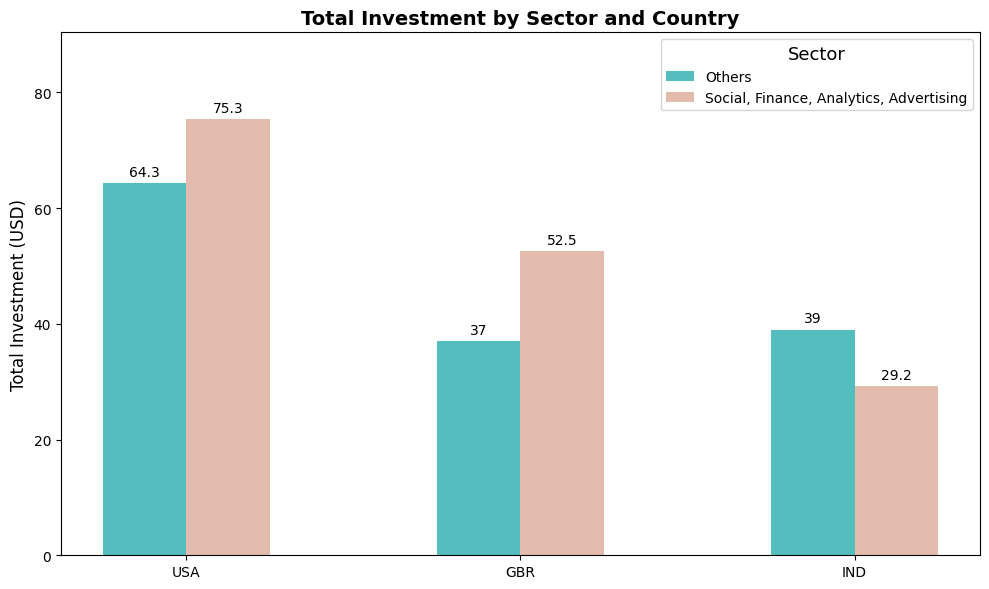

In [211]:
# Grouped Bar Chart

# Sample data
# results = [
#     {'Country': 'USA', 'Sector': 'Others', 'Total Investment (USD)': '$64.30M'},
#     {'Country': 'GBR', 'Sector': 'Others', 'Total Investment (USD)': '$37.00M'},
#     {'Country': 'IND', 'Sector': 'Others', 'Total Investment (USD)': '$39.00M'},
#     {'Country': 'USA', 'Sector': 'Social, Finance, Analytics, Advertising', 'Total Investment (USD)': '$75.30M'},
#     {'Country': 'GBR', 'Sector': 'Social, Finance, Analytics, Advertising', 'Total Investment (USD)': '$52.50M'},
#     {'Country': 'IND', 'Sector': 'Social, Finance, Analytics, Advertising', 'Total Investment (USD)': '$29.20M'}

# Convert 'Total Investment (USD)' to float
results_df['Total Investment (USD)'] = results_df['Total Investment (USD)'].str.replace('$', '').str.replace('M', '').astype(float)

# Extract unique countries and sectors
countries = results_df['Country'].unique()
sectors = results_df['Sector'].unique()

# Setting the label locations
x = np.arange(len(countries))

# Define data
data = {
    sector: results_df[results_df['Sector'] == sector].set_index('Country')['Total Investment (USD)'].reindex(countries, fill_value=0).tolist()
    for sector in sectors
}

# Define colors
colors = ["#54bebe", "#e4bcad", "#df979e", "#d7658b", "#c80064"]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and offset
width = 0.25
offset = 0

# Loop through each sector to plot the bars
for i, (sector, values) in enumerate(data.items()):
    rects = ax.bar(x + offset, values, width, label=sector, color=colors[i])
    ax.bar_label(rects, padding=3)
    offset += width

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Total Investment (USD)', fontsize=12)
ax.set_title('Total Investment by Sector and Country', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * ((len(sectors)-1) / 2))
ax.set_xticklabels(countries, rotation=0, fontsize=10)  # Set rotation angle to 0 degrees
ax.legend(title='Sector', title_fontsize='13', fontsize='10')

# Set y-axis limit
ax.set_ylim(0, results_df['Total Investment (USD)'].max() * 1.2)

# Show plot
plt.tight_layout()
plt.show()


**Investment by Company: WordCloud Overview**

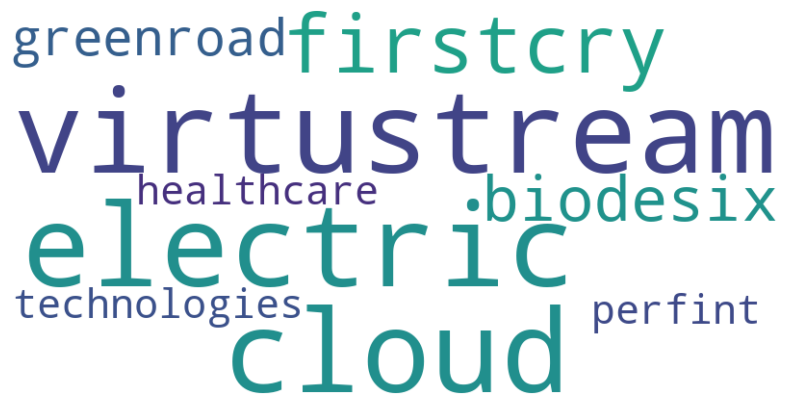

In [212]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a new list of dictionaries with only company name (without "/organization/") and total investment
data = [{'Company': result['Company'].replace('/organization/', ''), 'Total Investment (USD)': result['Total Investment (USD)']} for result in results]

# Extract company names and total investments into a single string for each company
text_data = ' '.join([entry['Company'] for entry in data])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


> **Inference**: From the analysis of the above code cells, it is observed that Spark Fund's should consider investing in the following companies to maximize profit while adhering to the preset criteria:

- Virtustream
- Electric Cloud
- FirstCry.com
- GreenRoad Technologies
- Perfint Healthcare








# **Conclusion**

>**Based on the analysis**, *Spark Funds'* should consider investing in the following companies:

- **Virtustream**
- **Electric Cloud**
- **FirstCry.com**
- **GreenRoad Technologies**
- **Perfint Healthcare**

> The **top three countries—USA, GBR, and IND—contribute to 96% of the total investments** in the venture type, indicating a high potential for returns in these regions.
  
> The alignment of the venture round type with Spark Funds' investment plan and the concentration of investments in the **"Others"** and **"Social, Finance, Analytics, Advertising"** sectors in these countries further strengthens the investment case for these companies.


---